In [3]:
import numpy as np
import pandas as pd 
import seaborn as sns

In [4]:
# 과적합, overfitting 이란?

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris, load_wine 
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('wine.csv')

In [7]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad


In [8]:
dt_clf = DecisionTreeClassifier()

In [9]:
iris=load_iris()

In [10]:
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=12)

In [11]:
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [12]:
#파라미터 보기
dt_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [13]:
from sklearn.tree import export_graphviz

In [14]:
export_graphviz(dt_clf, 
               out_file='tree_depth_2.dot',
               max_depth=None,
               feature_names=iris.feature_names,
               class_names=iris.target_names,
               filled=True,
               rotate=False)

In [15]:
import os
os.environ["PATH"]+=os.pathsep+'C:/Program Files (x86)/Graphviz2.38/bin/'

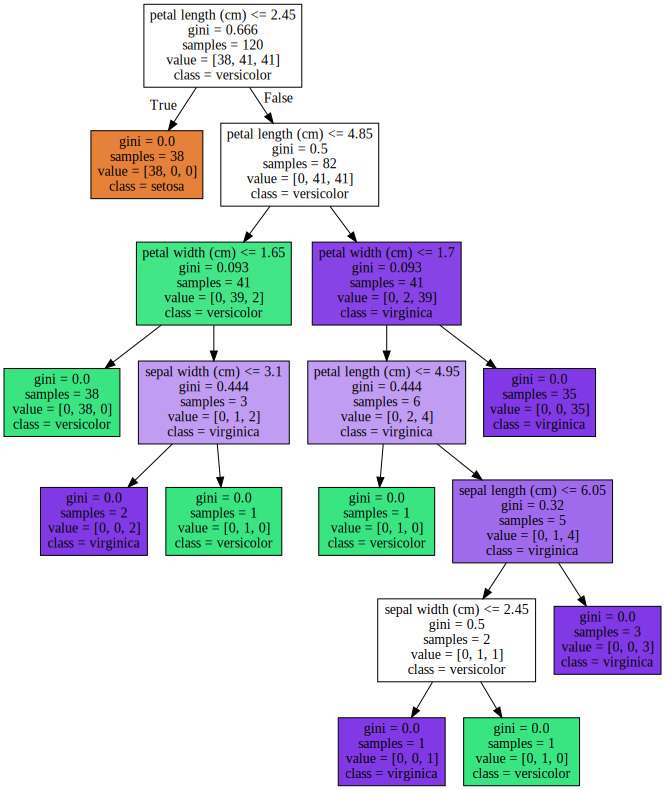

In [16]:
# tree.dot 을 열려면 
# with open 쓰면 된다 
import graphviz


with open('./tree_depth_2.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [17]:
# 타이타닉 데이터를 dt_clf graphviz를 화면에 구현 
# max_depth 
# min_samples_split 
# min_samples_leaf 


In [18]:
titanic = sns.load_dataset('titanic')

In [19]:
df = titanic.drop(['class', 'who', 'adult_male', 'embark_town', 'alive', 'alone'], axis=1)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,NaN
887,1,1,female,19.0,0,0,30.0000,S,B
888,0,3,female,NaN,1,2,23.4500,S,NaN
889,1,1,male,26.0,0,0,30.0000,C,C


In [20]:
df.isna().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
deck        688
dtype: int64

In [21]:
df['embarked'].fillna('S', inplace=True)

In [22]:
df.age.fillna(df.age.median(), inplace=True)

In [23]:
df.drop(columns='deck', inplace=True)

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
for i in ['sex', 'embarked']:
    encoder = LabelEncoder()
    encoder.fit(df[i])
    df[i]=encoder.transform(df[i])

In [26]:
df.isna().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [27]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [28]:
def standard(x):
    return (x - x.mean()) / x.std()

def normalization(x):
    return (x - x.min()) / (x.max() - x.min())

In [29]:
df.apply(lambda x : standard(x)).describe()
df.apply(lambda x : normalization(x)).describe()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,0.654321,0.647587,0.363679,0.065376,0.063599,0.062858,0.768238
std,0.486592,0.418036,0.477990,0.163605,0.137843,0.134343,0.096995,0.395752
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.271174,0.000000,0.000000,0.015440,0.500000
50%,0.000000,1.000000,1.000000,0.346569,0.000000,0.000000,0.028213,1.000000
75%,1.000000,1.000000,1.000000,0.434531,0.125000,0.000000,0.060508,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
y_df = df['survived']
x_df = df.drop(columns='survived')

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=12)

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
dt_clf = DecisionTreeClassifier()

In [35]:
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [36]:
dt_pred = dt_clf.predict(x_test)

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
print('Decision Tree 정확도 : %.2f' %accuracy_score(y_test, dt_pred))

Decision Tree 정확도 : 0.77


In [39]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [None,1,2,3,4,5,6,7,8,9,10],
              'min_samples_split': [2,3,4,5,6,7,8,9,10],
              'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10]}

In [40]:
grid_dtclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)

In [41]:
grid_dtclf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [42]:
grid_dtclf.best_params_

{'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [43]:
grid_dtclf.best_score_

0.841317837092485

In [44]:
best_dtclf = grid_dtclf.best_estimator_
best_dtclf

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5)

In [45]:
best_predictions = best_dtclf.predict(x_test)
accuracy_score(y_test, best_predictions)

0.776536312849162

In [46]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [47]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

In [48]:
best_dtclf

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5)

In [49]:
export_graphviz(best_dtclf,
                out_file='titanic_tree.dot',
                max_depth=None,
                feature_names=x_df.columns,
                class_names=['dead', 'survived'],
                filled=True)

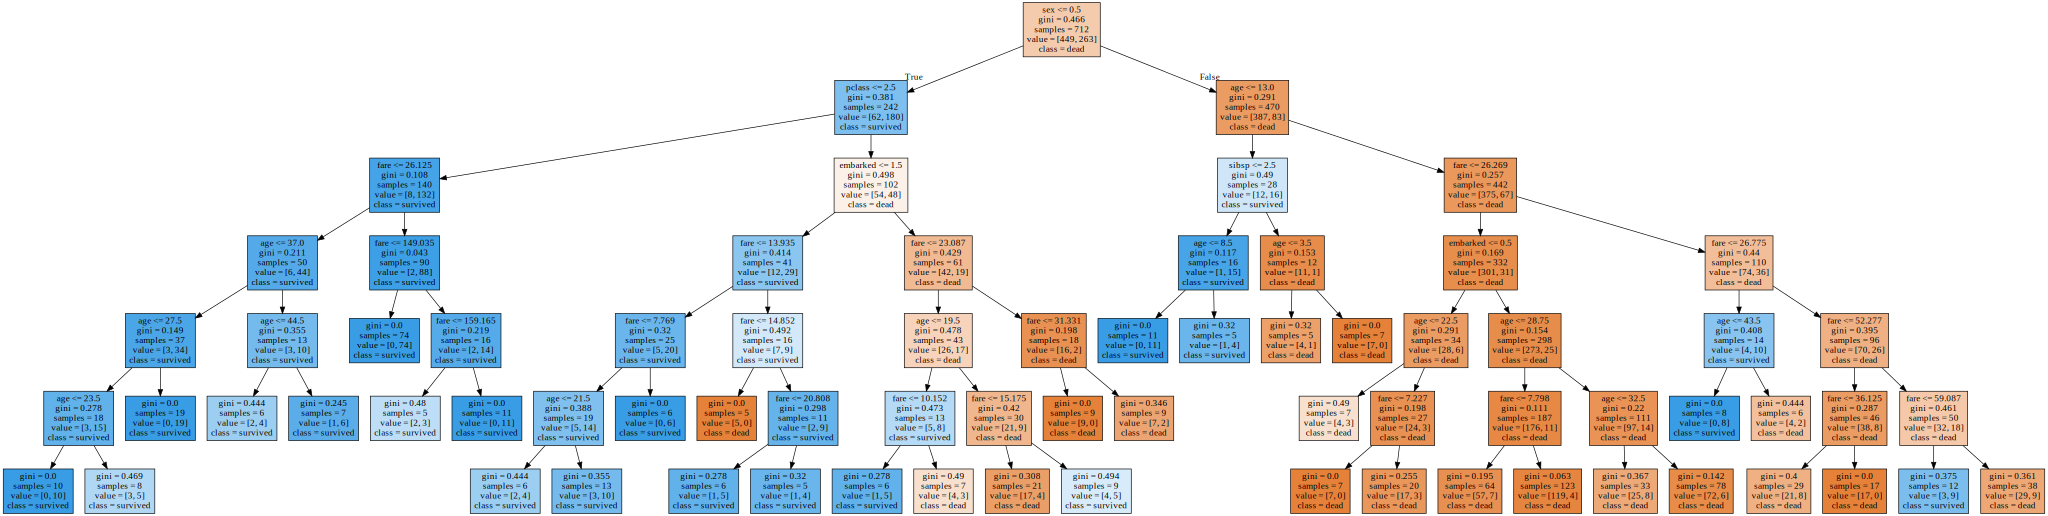

In [50]:
with open('./titanic_tree.dot') as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

In [54]:
sns.barplot(dt_clf.feature_importances, iris.feature_names)

AttributeError: 'DecisionTreeClassifier' object has no attribute 'feature_importances'

In [ ]:
def visualize_boundary(model, x, y):
  fig, ax = plt.subplots()
  ax.scatter(x[:, 0], x[:, 1], c=y, s=25, cmap='rainbow', edgecolors='k', clim=(y.min(), y.max()), zorder=3)
  ax.axis('tight')
  ax.axis('off')
  xlim_start, xlim_end = ax.get_xlim()
  ylim_start, ylim_end = ax.get_ylim()

  model.fit(x,y)
  xx, yy = np.meshgrid(np.linspace(xlim_start, xlim_end, num=200), np.linspace(ylim_start, ylim_end, num=200))
  z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

  n_classes = len(np.unique(y))
  contours = ax.contourf(xx, yy, z, alpha=0.3, levels=np.arange(n_classes + 1) - 0.5, 
                         cmap='rainbow', clim=(y.min(), y.max()), zorder=1)
dt_clf_mc = DecisionTreeClassifier().fit(x_features, y_labels)
visualize_boundary(dt_clf_mc, x_features, y_labels)